# ***Pohon Keputusan***

## **Pengertian Decision Tree**
Algoritma Decision Tree merupakan salah satu metode dalam pembelajaran mesin yang digunakan untuk klasifikasi maupun regresi. Algoritma ini bekerja dengan cara membagi data ke dalam simpul-simpul berdasarkan atribut tertentu sehingga menghasilkan pohon keputusan. Tujuan dari laporan ini adalah untuk menerapkan algoritma decision tree pada data buatan yang terdiri dari dua fitur dan tiga kelas.


## **Pengertian Purity**

**Kemurnian** dalam konteks decision tree mengacu pada sejauh mana sebuah subset data (atau simpul) terdiri dari satu kelas target saja (untuk masalah klasifikasi) atau memiliki nilai target yang sangat mirip (untuk masalah regresi). Semakin murni suatu simpul, semakin besar kemungkinannya untuk menjadi simpul daun (leaf node) dan memberikan prediksi yang jelas.

Algoritma decision tree selalu berusaha untuk **memaksimalkan kemurnian** pada setiap langkah pembagian. Ini berarti, pada setiap simpul, algoritma akan mencari fitur dan ambang batas (jika fitur numerik) yang, ketika data dibagi, menghasilkan simpul anak yang paling murni.

Ada beberapa metrik utama yang digunakan untuk mengukur kemurnian (atau kebalikannya, ketidakmurnian/impurity) dalam algoritma decision tree, terutama untuk masalah klasifikasi:

1.  **Gini Impurity (Impurity Gini):**
    * Mengukur probabilitas kesalahan klasifikasi jika sebuah sampel acak dari subset diberi label secara acak sesuai dengan distribusi kelas dalam subset tersebut.
    * Nilai Gini Impurity berkisar antara 0 dan 0.5.
    * Nilai 0 menunjukkan kemurnian sempurna (semua sampel di simpul tersebut termasuk dalam satu kelas yang sama).
    * Nilai 0.5 menunjukkan ketidakmurnian maksimum (distribusi kelas merata, misalnya, untuk masalah klasifikasi biner, 50% kelas A dan 50% kelas B).
    * Algoritma akan memilih pembagian yang menghasilkan **penurunan Gini Impurity terbesar** (yaitu, peningkatan kemurnian terbesar).

    **Formula Gini Impurity:**
    $G = 1 - \sum_{i=1}^{C} p_i^2$
    di mana $p_i$ adalah proporsi sampel yang termasuk dalam kelas $i$ di simpul tersebut, dan $C$ adalah jumlah kelas.

2.  **Entropy dan Information Gain:**
    * **Entropy** adalah ukuran ketidakpastian atau "disorder" dalam sebuah set data. Semakin tinggi entropy, semakin campur aduk kelas-kelas di dalam simpul tersebut.
    * Nilai entropy berkisar antara 0 dan 1 (untuk masalah klasifikasi biner).
    * Nilai 0 menunjukkan kemurnian sempurna (tidak ada ketidakpastian, semua sampel termasuk dalam satu kelas).
    * Nilai 1 menunjukkan ketidakpastian maksimum (distribusi kelas merata).
    * **Information Gain** mengukur seberapa banyak ketidakpastian (entropy) berkurang setelah data dibagi berdasarkan fitur tertentu.
    * Algoritma akan memilih pembagian yang menghasilkan **Information Gain terbesar**.

    **Formula Entropy:**
    $E(S) = - \sum_{i=1}^{C} p_i \log_2(p_i)$
    di mana $S$ adalah set data, $p_i$ adalah proporsi sampel yang termasuk dalam kelas $i$, dan $C$ adalah jumlah kelas.

    **Formula Information Gain:**
    $Gain(S, A) = E(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} E(S_v)$
    di mana $S$ adalah set data induk, $A$ adalah atribut yang dipertimbangkan, $Values(A)$ adalah nilai unik dari atribut $A$, $|S_v|$ adalah jumlah sampel di subset $S_v$ (untuk nilai $v$ dari atribut $A$), dan $|S|$ adalah jumlah total sampel di $S$.

### *Matriks Pengukuran Purity*



## **Penerapan Algoritma pada Data**

### **Data**

| No | Cuaca   | Waktu | Kelas       |
| -- | ------- | ----- | ----------- |
| 1  | Cerah   | Pagi  | Olahraga    |
| 2  | Hujan   | Malam | Menonton TV |
| 3  | Mendung | Siang | Bekerja     |
| 4  | Cerah   | Pagi  | Bekerja     |
| 5  | Hujan   | Malam | Menonton TV |
| 6  | Cerah   | Malam | Menonton TV |
| 7  | Mendung | Pagi  | Olahraga    |
| 8  | Mendung | Malam | Menonton TV |
| 9  | Hujan   | Siang | Bekerja     |
| 10 | Cerah   | Pagi  | Olahraga    |
| 11 | Mendung | Siang | Bekerja     |
| 12 | Cerah   | Malam | Bekerja     |
| 13 | Hujan   | Malam | Menonton TV |
| 14 | Mendung | Pagi  | Olahraga    |
| 15 | Cerah   | Malam | Menonton TV |


### **Perhitungan Manual**

Total 15 data, dengan distribusi class:

| Kelas       | Jumlah |
| ----------- | ------ |
| Olahraga    | 4      |
| Menonton TV | 6      |
| Bekerja     | 5      |


#### **Entropi Class**

$$
H(S) = -\sum p_i \log_2 p_i
$$

Dengan:

* $p_{\text{Olahraga}} = \frac{4}{15}$
* $p_{\text{Menonton TV}} = \frac{6}{15}$
* $p_{\text{Bekerja}} = \frac{5}{15}$

$$
H(S) = -\left(\frac{4}{15} \log_2 \frac{4}{15} + \frac{6}{15} \log_2 \frac{6}{15} + \frac{5}{15} \log_2 \frac{5}{15}\right)
$$

Hasil:

$$
H(S) ≈ \boxed{1.566}
$$


![entropi class](entropiclass.png "a title")

---

#### **Split Entropi Cuaca**

##### 1. Cerah (6 data)

* Olahraga = 2
* Bekerja = 2
* Menonton TV = 2

* $p_i = \frac{2}{6}$ untuk ketiganya

$$
H(Cerah) = -3 \cdot \left(\frac{2}{6} \log_2 \frac{2}{6}\right) = -3 \cdot \left(\frac{1}{3} \log_2 \frac{1}{3}\right) ≈ 1.585
$$


![cerah](cerah.png "entropi cerah")

##### 2. Hujan (4 data)

* Menonton TV = 3 
* Bekerja = 1

$$
H(Hujan) = -\left(\frac{3}{4} \log_2 \frac{3}{4} + \frac{1}{4} \log_2 \frac{1}{4}\right)
$$

$$
= -(0.75 \cdot \log_2 0.75 + 0.25 \cdot \log_2 0.25) ≈ 0.811
$$

![hujan.png](hujan.png "entropi hujan")

##### 3. Mendung (5 data)

* Bekerja = 2 
* Olahraga = 2 
* Menonton TV = 1 

$$
p = \frac{2}{5}, \frac{2}{5}, \frac{1}{5}
$$

$$
H(Mendung) = -\left(2/5 \log_2 2/5 + 2/5 \log_2 2/5 + 1/5 \log_2 1/5\right) ≈ 1.522
$$

![mendung.png](mendung.png "entropi mendung")


##### **Split entropy total fitur Cuaca**

Gabungkan semua:

$$
H_{Cuaca} = \frac{6}{15} \cdot 1.585 + \frac{4}{15} \cdot 0.811 + \frac{5}{15} \cdot 1.522
$$

$$
= 0.634 + 0.216 + 0.508 ≈ \boxed{1.358}
$$



##### **Information Gain:**

$$
H_{total} = 1.566
$$

$$
IG(Cuaca) = 1.566 - 1.3576 = \boxed{0.207}
$$



![splitentropicuaca](split_entropi_cuaca.png "split entropi cuaca")

----

#### **Split Entropi Waktu**

##### 1. Entropi Pagi (5 data)

* Olahraga = 4
* Bekerja = 1


$$
H(Pagi) = -\left(\frac{4}{5} \log_2 \frac{4}{5} + \frac{1}{5} \log_2 \frac{1}{5}\right)
$$

$$
= - (0.8 \cdot \log_2 0.8 + 0.2 \cdot \log_2 0.2)
$$

$$
≈ - (0.8 \cdot -0.322 + 0.2 \cdot -2.322)
$$

$$
≈ 0.258 + 0.464 = \boxed{0.722}
$$

![pagi](pagi.png "entropi pagi")


##### 2.  Entropi Siang (3 data, semua bekerja)

* Pure class → Entropi = $\boxed{0}$

![siang](siang.png "entropi siang")



##### 3. Entropi Malam (7 data)

* Menonton TV = 6
* Bekerja = 1

$$
H(Malam) = -\left(\frac{6}{7} \log_2 \frac{6}{7} + \frac{1}{7} \log_2 \frac{1}{7}\right)
$$

$$
≈ - (0.857 \cdot \log_2 0.857 + 0.143 \cdot \log_2 0.143)
$$

$$
≈ - (0.857 \cdot -0.222 + 0.143 \cdot -2.807)
$$

$$
≈ 0.190 + 0.401 = \boxed{0.591}
$$

![malam](malam.png "entropi malam")



##### **Split entropy total fitur Waktu**

$$
H_{Waktu} = \frac{5}{15} \cdot 0.722 + \frac{3}{15} \cdot 0 + \frac{7}{15} \cdot 0.591
$$

$$
= 0.241 + 0 + 0.275 = \boxed{0.516}
$$

##### **Information Gain:**

$$
H_{total} = 1.566
$$

$$
IG(Waktu) = 1.566 - 0.516 = \boxed{1.050}
$$

![split entropi waktu](split_entropi_waktu.png "split entropi waktu")


----

### **Perhitungan dengan Python**

#### **Perhitungan Menggunakan Fungsi**

In [1]:
import math
from collections import Counter

# Fungsi untuk menghitung entropy dari daftar label
def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    return -sum((count/total) * math.log2(count/total) for count in counts.values())

# Dataset (15 data)
data = [
    {"Cuaca": "Cerah", "Waktu": "Pagi",  "Aktivitas": "Olahraga"},
    {"Cuaca": "Hujan", "Waktu": "Malam", "Aktivitas": "Menonton TV"},
    {"Cuaca": "Mendung", "Waktu": "Siang", "Aktivitas": "Bekerja"},
    {"Cuaca": "Cerah", "Waktu": "Pagi",  "Aktivitas": "Bekerja"},
    {"Cuaca": "Hujan", "Waktu": "Malam", "Aktivitas": "Menonton TV"},
    {"Cuaca": "Cerah", "Waktu": "Malam", "Aktivitas": "Menonton TV"},
    {"Cuaca": "Mendung", "Waktu": "Pagi",  "Aktivitas": "Olahraga"},
    {"Cuaca": "Mendung", "Waktu": "Malam", "Aktivitas": "Menonton TV"},
    {"Cuaca": "Hujan", "Waktu": "Siang", "Aktivitas": "Bekerja"},
    {"Cuaca": "Cerah", "Waktu": "Pagi",  "Aktivitas": "Olahraga"},
    {"Cuaca": "Mendung", "Waktu": "Siang", "Aktivitas": "Bekerja"},
    {"Cuaca": "Cerah", "Waktu": "Malam", "Aktivitas": "Bekerja"},
    {"Cuaca": "Hujan", "Waktu": "Malam", "Aktivitas": "Menonton TV"},
    {"Cuaca": "Mendung", "Waktu": "Pagi",  "Aktivitas": "Olahraga"},
    {"Cuaca": "Cerah", "Waktu": "Malam", "Aktivitas": "Menonton TV"}
]

# Hitung entropy total
labels = [row["Aktivitas"] for row in data]
entropy_total = entropy(labels)
print(f"Entropy total: {entropy_total:.3f}")

# Hitung Information Gain untuk fitur 'Waktu'
def information_gain(data, feature, target):
    total_entropy = entropy([row[target] for row in data])
    values = set(row[feature] for row in data)
    
    split_entropy = 0
    for value in values:
        subset = [row[target] for row in data if row[feature] == value]
        weight = len(subset) / len(data)
        split_entropy += weight * entropy(subset)
    
    ig = total_entropy - split_entropy
    return ig, split_entropy

# Hitung IG untuk fitur 'Waktu'
ig_waktu, split_entropy_waktu = information_gain(data, 'Waktu', 'Aktivitas')
print(f"Split Entropy (Waktu): {split_entropy_waktu:.3f}")
print(f"Information Gain (Waktu): {ig_waktu:.3f}")


Entropy total: 1.566
Split Entropy (Waktu): 0.517
Information Gain (Waktu): 1.049


In [2]:
import math
from collections import Counter

# Fungsi untuk menghitung entropy dari daftar label
def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    return -sum((count/total) * math.log2(count/total) for count in counts.values())

# Dataset (15 data)
data = [
    {"Cuaca": "Cerah", "Waktu": "Pagi",  "Aktivitas": "Olahraga"},
    {"Cuaca": "Hujan", "Waktu": "Malam", "Aktivitas": "Menonton TV"},
    {"Cuaca": "Mendung", "Waktu": "Siang", "Aktivitas": "Bekerja"},
    {"Cuaca": "Cerah", "Waktu": "Pagi",  "Aktivitas": "Bekerja"},
    {"Cuaca": "Hujan", "Waktu": "Malam", "Aktivitas": "Menonton TV"},
    {"Cuaca": "Cerah", "Waktu": "Malam", "Aktivitas": "Menonton TV"},
    {"Cuaca": "Mendung", "Waktu": "Pagi",  "Aktivitas": "Olahraga"},
    {"Cuaca": "Mendung", "Waktu": "Malam", "Aktivitas": "Menonton TV"},
    {"Cuaca": "Hujan", "Waktu": "Siang", "Aktivitas": "Bekerja"},
    {"Cuaca": "Cerah", "Waktu": "Pagi",  "Aktivitas": "Olahraga"},
    {"Cuaca": "Mendung", "Waktu": "Siang", "Aktivitas": "Bekerja"},
    {"Cuaca": "Cerah", "Waktu": "Malam", "Aktivitas": "Bekerja"},
    {"Cuaca": "Hujan", "Waktu": "Malam", "Aktivitas": "Menonton TV"},
    {"Cuaca": "Mendung", "Waktu": "Pagi",  "Aktivitas": "Olahraga"},
    {"Cuaca": "Cerah", "Waktu": "Malam", "Aktivitas": "Menonton TV"}
]

# Hitung entropy total
labels = [row["Aktivitas"] for row in data]
entropy_total = entropy(labels)
print(f"Entropy total: {entropy_total:.3f}")

# Hitung Information Gain untuk fitur 'Waktu'
def information_gain(data, feature, target):
    total_entropy = entropy([row[target] for row in data])
    values = set(row[feature] for row in data)
    
    split_entropy = 0
    for value in values:
        subset = [row[target] for row in data if row[feature] == value]
        weight = len(subset) / len(data)
        split_entropy += weight * entropy(subset)
    
    ig = total_entropy - split_entropy
    return ig, split_entropy

# Hitung IG untuk fitur 'Waktu'
ig_waktu, split_entropy_waktu = information_gain(data, 'Cuaca', 'Aktivitas')
print(f"Split Entropy (Cuaca): {split_entropy_waktu:.3f}")
print(f"Information Gain (Cuaca): {ig_waktu:.3f}")


Entropy total: 1.566
Split Entropy (Cuaca): 1.358
Information Gain (Cuaca): 0.208


#### **Perhitungan Menggunakan Scikit Learn**

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Dataset
data = {
    "Cuaca": ["Cerah", "Hujan", "Mendung", "Cerah", "Hujan", "Cerah", "Mendung", "Mendung", "Hujan", "Cerah", "Mendung", "Cerah", "Hujan", "Mendung", "Cerah"],
    "Waktu": ["Pagi", "Malam", "Siang", "Pagi", "Malam", "Malam", "Pagi", "Malam", "Siang", "Pagi", "Siang", "Malam", "Malam", "Pagi", "Malam"],
    "Aktivitas": ["Olahraga", "Menonton TV", "Bekerja", "Bekerja", "Menonton TV", "Menonton TV", "Olahraga", "Menonton TV", "Bekerja", "Olahraga", "Bekerja", "Bekerja", "Menonton TV", "Olahraga", "Menonton TV"]
}

# Label encoding
le_cuaca = LabelEncoder()
le_waktu = LabelEncoder()
le_aktivitas = LabelEncoder()

df["Cuaca_enc"] = le_cuaca.fit_transform(df["Cuaca"])
df["Waktu_enc"] = le_waktu.fit_transform(df["Waktu"])
df["Aktivitas_enc"] = le_aktivitas.fit_transform(df["Aktivitas"])

# Fitur dan target
X = df[["Cuaca_enc", "Waktu_enc"]]
y = df["Aktivitas_enc"]

# Decision Tree dengan entropi (information gain)
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X, y)

# Tampilkan information gain (feature importance)
feature_names = ["Cuaca", "Waktu"]
for name, score in zip(feature_names, clf.feature_importances_):
    print(f"Information Gain untuk fitur '{name}': {score:.3f}")


NameError: name 'df' is not defined

#### **Visualisasi Decision Tree**

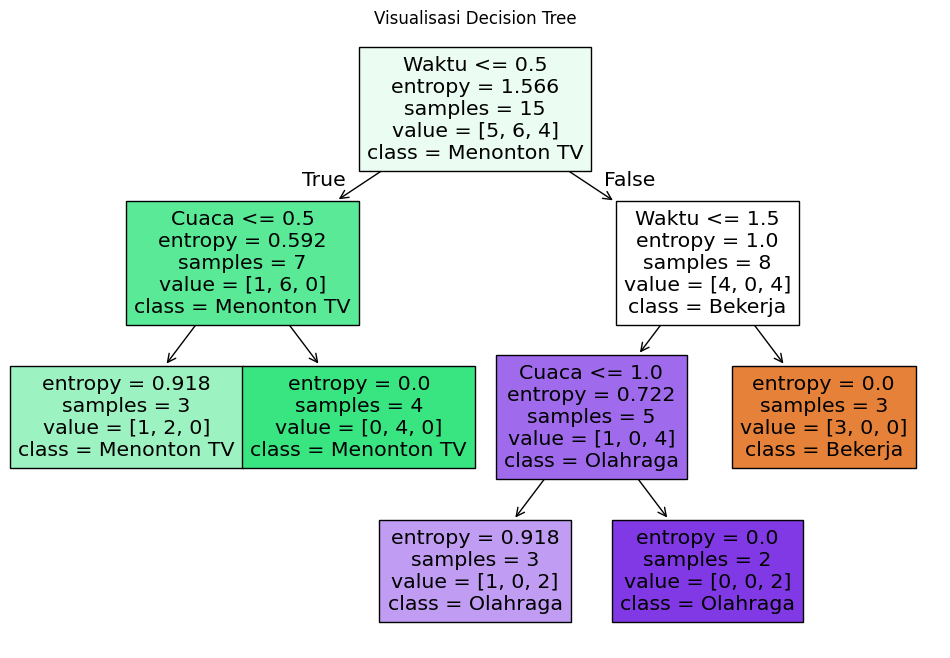

In [23]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt

# Visualisasi pohon
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=["Cuaca", "Waktu"], class_names=le_aktivitas.classes_, filled=True)
plt.title("Visualisasi Decision Tree")
plt.show()


In [25]:
# Cetak aturan
rules = export_text(clf, feature_names=["Cuaca", "Waktu"])
print("Rules dari Decision Tree:")
print(rules)


Rules dari Decision Tree:
|--- Waktu <= 0.50
|   |--- Cuaca <= 0.50
|   |   |--- class: 1
|   |--- Cuaca >  0.50
|   |   |--- class: 1
|--- Waktu >  0.50
|   |--- Waktu <= 1.50
|   |   |--- Cuaca <= 1.00
|   |   |   |--- class: 2
|   |   |--- Cuaca >  1.00
|   |   |   |--- class: 2
|   |--- Waktu >  1.50
|   |   |--- class: 0



#### **Pengujian 2 Data Baru**

In [24]:
# Data baru
data_baru = pd.DataFrame({
    "Cuaca": ["Hujan", "Cerah"],
    "Waktu": ["Pagi", "Siang"]
})

# Encode data baru dengan encoder yang sesuai
data_baru_enc = pd.DataFrame({
    "Cuaca_enc": le_cuaca.transform(data_baru["Cuaca"]),
    "Waktu_enc": le_waktu.transform(data_baru["Waktu"])
})

# Prediksi
prediksi_enc = clf.predict(data_baru_enc)
prediksi_aktual = le_aktivitas.inverse_transform(prediksi_enc)

# Cetak hasil prediksi
for i, (cuaca, waktu, aktivitas) in enumerate(zip(data_baru["Cuaca"], data_baru["Waktu"], prediksi_aktual), 1):
    print(f"Data {i}: Cuaca = {cuaca}, Waktu = {waktu} → Prediksi Aktivitas = {aktivitas}")


Data 1: Cuaca = Hujan, Waktu = Pagi → Prediksi Aktivitas = Olahraga
Data 2: Cuaca = Cerah, Waktu = Siang → Prediksi Aktivitas = Bekerja
